In [1]:
import numpy as np

vggt_info = np.load("/workspace/data/vggt_npy/run_3.npz", allow_pickle=True)

In [2]:
vggt_info.keys()

KeysView(NpzFile '/workspace/data/vggt_npy/run_3.npz' with keys: x3d_pose, camera_intrinsics, R, t, C)

In [3]:
for k, v in vggt_info.items():
	print(k, type(v), v.shape if isinstance(v, np.ndarray) else '')

x3d_pose <class 'numpy.ndarray'> (360, 17, 3)
camera_intrinsics <class 'numpy.ndarray'> (360, 2, 3, 3)
R <class 'numpy.ndarray'> (360, 2, 3, 3)
t <class 'numpy.ndarray'> (360, 2, 3)
C <class 'numpy.ndarray'> (360, 2, 3)


In [4]:
vggt_info["x3d_pose"][0].shape

(17, 3)

In [5]:
import sys
import os
import matplotlib.pyplot as plt

parent_dir = os.path.dirname(os.getcwd()) 
sys.path.insert(0, parent_dir)

from vggt.vis.skeleton_visualizer import SkeletonVisualizer	

visualizer = SkeletonVisualizer()


<Axes3D: title={'center': '3D Skeleton Visualization'}, xlabel='X', ylabel='Z', zlabel='Y (up)'>

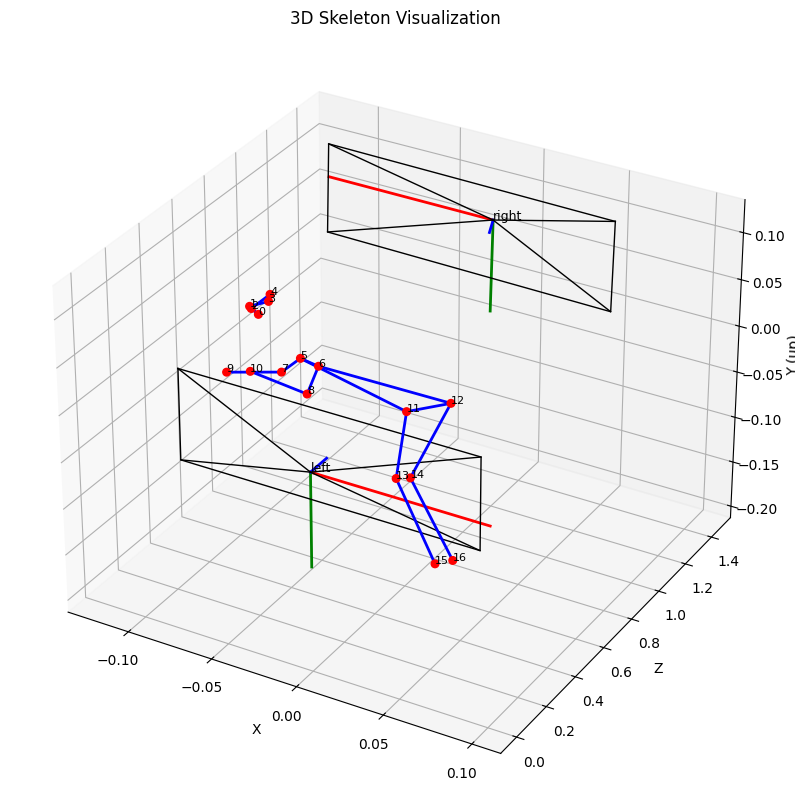

In [8]:
fig = plt.figure(figsize=(10, 10))

ax = fig.add_subplot(111, projection='3d')

visualizer.draw_camera(
    ax,
	vggt_info['R'][0][0],
	vggt_info['t'][0][0],
    label="left",
)

visualizer.draw_camera(
	ax,
	vggt_info['R'][0][1],
	vggt_info['t'][0][1],
	label="right",
)

visualizer.draw_skeleton_3d(
	ax=ax,
	points_3d=vggt_info["x3d_pose"][0],
)